In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the DataFrame from the pickle file
df = pd.read_pickle('./data/Sheik_vs_Fox_full_input_data.pkl')
labels = ['DPAD_LEFT', 'DPAD_RIGHT', 'DPAD_DOWN', 'DPAD_UP', 'Z', 'R', 'L', 'A', 'B', 'X', 'Y', 'START','J_X','J_Y','C_X','C_Y','T_L','T_R']

# Now, 'loaded_df' contains the data from the pickle file as a DataFrame

In [6]:
df.head

<bound method NDFrame.head of                                              TimeSeries  Label  \
17    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
28    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
30    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
47    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
22    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
...                                                 ...    ...   
4501  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
4509  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
4506  [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...      1   
4511  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
4507  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   

                                                  FName  
17            00_37_01.564Z [314] Fox + Sheik (FoD).slp  
28            00_37_01.564Z [314] Fox + Sheik (FoD).slp  
30 

In [7]:
# Assuming df is your DataFrame with 'TimeSeries' column containing 2D numpy arrays
# Define the indices of the columns to be removed
columns_to_remove = [0, 1, 2, 3, 6, 7, 11]

# Use a list comprehension to create a new 'TimeSeries' column with modified arrays
df['TimeSeries'] = [np.delete(array, columns_to_remove, axis=1) for array in df['TimeSeries']]


In [8]:
# Define the labels for the new columns
new_column_labels = ['Z', 'A', 'B', 'X', 'Y', 'J_X', 'J_Y', 'C_X', 'C_Y', 'T_L', 'T_R']

# Iterate through the new column labels and add them to the DataFrame
for label in new_column_labels:
    df[label] = df['TimeSeries'].apply(lambda arr: arr[:, new_column_labels.index(label)])


In [9]:
# Create a new column 'max_X_Y' with the maximum of 'X' and 'Y' numpy arrays
df['max_X_Y'] = df.apply(lambda row: np.maximum(row['X'], row['Y']), axis=1)

# Create a new column 'max_T' with the maximum of 'T_L' and 'T_Y' numpy arrays
df['max_T'] = df.apply(lambda row: np.maximum(row['T_L'], row['T_R']), axis=1)

# Convert 'J_X' and 'J_Y' to polar coordinates and create 'J_theta' and 'J_radius' columns
df['J_theta'] = df.apply(lambda row: np.arctan2(row['J_Y'], row['J_X']), axis=1)
df['J_radius'] = df.apply(lambda row: np.sqrt(row['J_X'] ** 2 + row['J_Y'] ** 2), axis=1)

# Convert 'C_X' and 'C_Y' to polar coordinates and create 'C_theta' and 'C_radius' columns
df['C_theta'] = df.apply(lambda row: np.arctan2(row['C_Y'], row['C_X']), axis=1)
df['C_radius'] = df.apply(lambda row: np.sqrt(row['C_X'] ** 2 + row['C_Y'] ** 2), axis=1)



# Display the resulting DataFrame
print(df)

                                             TimeSeries  Label  \
17    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
28    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
30    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
47    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
22    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.987500011920929, ...      0   
...                                                 ...    ...   
4501  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
4509  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
4506  [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -0.32499998807...      1   
4511  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.98750001192...      0   
4507  [[0.0, 0.0, 0.0, 1.0, 0.0, -0.824999988079071,...      1   

                                                  FName  \
17            00_37_01.564Z [314] Fox + Sheik (FoD).slp   
28            00_37_01.564Z [314] Fox + Sheik (FoD).slp   
30             00_40_07.217Z [

In [10]:
df.columns

Index(['TimeSeries', 'Label', 'FName', 'Z', 'A', 'B', 'X', 'Y', 'J_X', 'J_Y',
       'C_X', 'C_Y', 'T_L', 'T_R', 'max_X_Y', 'max_T', 'J_theta', 'J_radius',
       'C_theta', 'C_radius'],
      dtype='object')

In [12]:


def overlay_charts_from_columns(df, column_lists, row_index):
    """
    Generate an overlaid chart from selected columns in a DataFrame row.

    Parameters:
    - df: DataFrame containing the data.
    - column_lists: List of lists where each sublist contains column names to overlay.
    - row_index: Row index in the DataFrame for the data to plot.

    Example usage:
    overlay_charts_from_columns(df, [['max_X_Y', 'max_T']], 0)
    """

    # Get the row data for the specified index
    row_data = df.iloc[row_index]

    # Create a new figure for the chart
    plt.figure(figsize=(100, 10))

    # Flatten the list of column names within column_lists
    flattened_column_names = [col for sublist in column_lists for col in sublist]

    # Loop through the flattened column names and plot each column individually
    for column_name in flattened_column_names:
        plt.plot(row_data[column_name], label=f'{column_name}')

    # Set chart title based on the selected column names
    chart_title = ', '.join(flattened_column_names)
    plt.title(chart_title)

    # Add legend to distinguish different columns
    plt.legend()

    # Customize labels, axis titles, etc. as needed
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')

    # Show the chart
    plt.show()

# Example usage:
# overlay_charts_from_columns(df, [['max_X_Y', 'max_T']], 0)



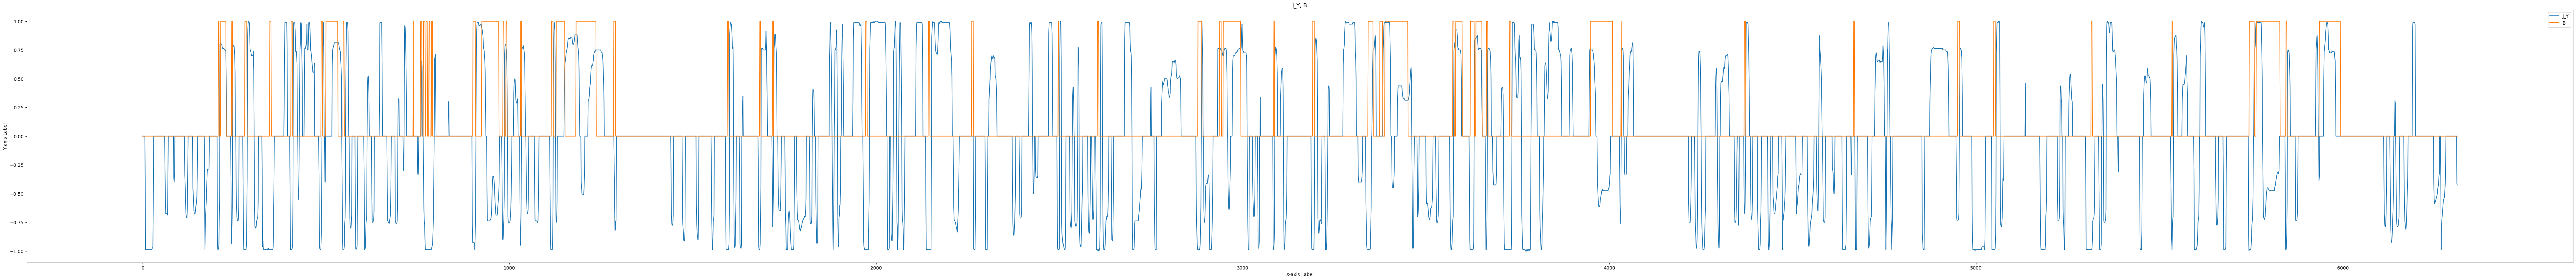

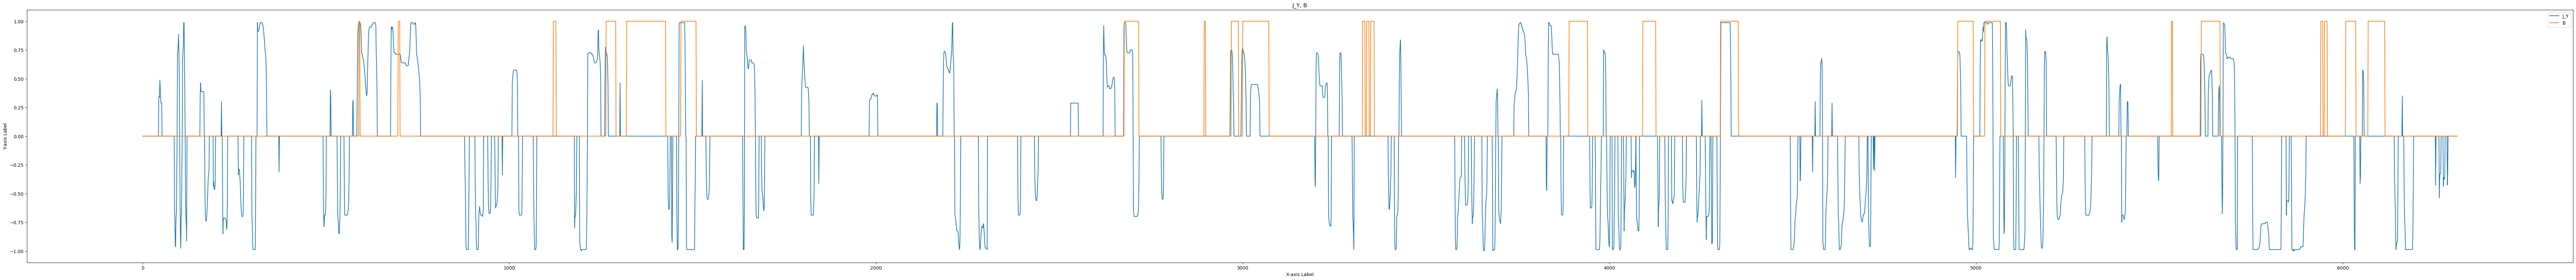

In [23]:
n = 7

row = 2*n
# ['TimeSeries', 'Label', 'FName', 'Z', 'R', 'L', 'A', 'B', 'X', 'Y',
#        'J_X', 'J_Y', 'C_X', 'C_Y', 'T_L', 'T_R', 'max_X_Y', 'max_T', 'J_theta',
#        'J_radius', 'C_theta', 'C_radius'],
# column_lists = [['max_X_Y','max_T']]
column_lists = [['J_Y','B']]
overlay_charts_from_columns(df, column_lists, row)

row += 1 
# ['TimeSeries', 'Label', 'FName', 'Z', 'R', 'L', 'A', 'B', 'X', 'Y',
#        'J_X', 'J_Y', 'C_X', 'C_Y', 'T_L', 'T_R', 'max_X_Y', 'max_T', 'J_theta',
#        'J_radius', 'C_theta', 'C_radius'],
# column_lists = [['max_X_Y','max_T']]
column_lists = [['J_Y','B']]
overlay_charts_from_columns(df, column_lists, row)

In [51]:

df['game_length_sec'] = df['Z'].apply(len) / 60
df['game_length_sec'].describe()


count    4516.000000
mean      165.246154
std        72.420627
min        26.500000
25%       136.466667
50%       164.041667
75%       191.200000
max      2886.266667
Name: game_length_sec, dtype: float64

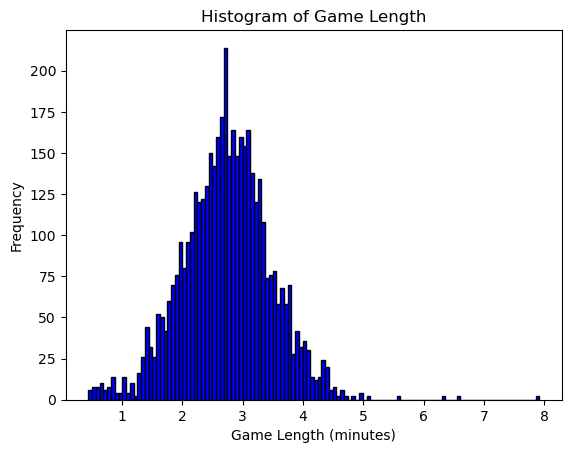

In [52]:
# Filter out games longer than 8 minutes
filtered_df = df[df['game_length_sec'] <= 8*60]

# Create a histogram plot of the 'game_length' column
# bins are 4 seconds wide
plt.hist(filtered_df['game_length_sec'] / 60, bins=8*15, color='blue', edgecolor='black')

# Customize the plot with labels and title
plt.xlabel('Game Length (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Game Length')

# Show the histogram
plt.show()